# Multimodal Deception Detection: Combining EEG and Behavioral Cues

# Spring 2025 Data Science Project

Ed Yun, Andrew Choe, Raha Moshasha

## Contributions

### Ed Yun

- **B: Dataset Curation and Preprocessing**  
Created github repository for group to use for data_processing file.

- **C: Data Exploration and Summary Statistics**  
Used one-sample z-test and chi-squared test to come to conclusions and created visualizations for each strategy. 
Helped format everything with markdown to make file look nice and clearly show each section.

- **D: ML Algorithm Design/Development**  
Helped brainstorm ideas and design our ML algorithm.

- **F: Visualization, Result Analysis, Conclusion**  
Created visualizations using a bar plot and heat map to support the primary analysis.

- **G: Final Tutorial Report Creation**  
Created the Final_Deliverable file and created an markdown outline for group to follow. Moved work from previous 
files into the final_deliverable file. Contributed to the header, data curation, visualization, and exploratory data analysis sections.


### Raha Moshasha

- **A: Project Idea**
Decided on the topic of neuroscience, and conducted research to discover different topics.

- **B: Data Exploration and Summary Statistics** 
Found data sets to use for research. Created the data_processing file, imported datasets to git repo, created dicts, and pre-processed the data.

- **C: Data Exploration and Summary Statistics** 
Used a two-sample t-test to get conclusions on differences between true vs deceptive tests based on eeg activity in different brain regions. 

- **D: ML Algorithm Design/Development**  
  Helped brainstorm ideas and design our ML algorithm

- **F: Visualization, Result Analysis, Conclusion**  
  Created conclusion, future directions, and helped with analysis

- **G: Final Tutorial Report Creation**  
Created the title, and introduction, and additional research

### Andrew Choe

- **A: Project Idea**
  Helped brainstorm research ideas

- **B: Data Exploration and Summary Statistics** 
Assisted in finding data sets to use for research. Assisted in pre-processing the data, cleaned data points

- **C: Data Exploration and Summary Statistics** 
Created a plot to disocver correlation of likely gestures to truthful/deceptive subjects through a t-test. 
Helped analyze the plots to find the correct conclusions

- **D: ML Algorithm Design/Development**  
  Worked on creating a plan and question for the algorithm, helped develop the code used.

- **E: ML Algorithm Training and Test Data Analysis**  
  Contributed to writing the ML Algorithm

- **F: Visualization, Result Analysis, Conclusion**  
  Helped create the visualization, as well as the result analysis




## Introduction
Deception is a complex cognitive process that involves different regions of the brain. Methods usually used for lie detection (such as polygraphs) are heavily influenced by physiological responses such as heart rate and respiration. These physiological responses can be affected by stress and can vary from person to person, creating a level of doubt in their outcomes. To overcome these limitations, our group decided to look directly at brain activity by studying the electroencephalography (EEG) data from various trials. By pairing the EEG data with external physical behavior—such as facial expressions and movement patterns—we hope to find the true patterns that differentiate deceptive and truthful responses. We use two different datasets: one containing EEG data and another containing physical behavior data, both collected from participants engaged in tasks designed to elicit both truthful and deceptive responses.

Why is this important? Understanding the differences in neural activity between truthful and deceptive behavior can influence neuroscience, psychology, and the legal system. A reliable method for detecting deception could improve the accuracy of police investigations, enhance security screenings, and contribute to the broader understanding of cognitive control.

### Important Definitions

Electroencephalography(EEG) is a medical test that measures the electrical activity of the brain. This activity is recorded using electrodes places on the scalp. The data in the EEG table have different abbreviations, each for a placing of a group of electrodes getting readings for that area. 

#### Electrode areas, and their roles:
- AF3(Left Anterial Frontal) -> Attention, Decision Makikng, Emotion
- T7(Left Temporal) -> Auditory Processing, Language
- Pz(Midline Parietal) -> Sensory Integration
- T8(Right Temporal) -> Auditory Processing, Social Perception
- AF4(Right Anterior Frontal) -> Executive function, Emotional control

## Data Curation


https://data.mendeley.com/datasets/5gzxb2bzs2/1

Keshari, T., Puthusserypady, S. (2020). EEG-based Deception Detection Dataset. Mendeley Data, V1. https://data.mendeley.com/datasets/5gzxb2bzs2/1

https://web.eecs.umich.edu/~mihalcea/downloads.html : real-life deception

Mihalcea, R., Strapparava, C. (2009). The Real-life Deception Dataset. University of Michigan. https://web.eecs.umich.edu/~mihalcea/downloads.html


We are using two datasets for our research. The first dataset contains EEG recordings collected while people were either lying or telling the truth. This gives us insight into how brain activity changes during deception. The second one focuses on physical behavior and includes videos of people being truthful or deceptive during interviews. This will help us analyze their body language and facial expressions to spot patterns linked to lying.

By comparing these two types of data—physical and neurological—we hope to better understand what signals can reliably indicate when someone is lying. Our goal is to explore how these cues could be used to improve lie detection in real-world settings like security and psychology.

In [17]:
#Imports
# also requires openpyxl : pip install pandas xlrd openpyxl
# also requires scikit-learn : pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Preprocessing

We used two datasets:

- **LieWaves (EEG)**: EEG signals under truthful and deceptive conditions, preprocessed with Band Pass, ASR, ICA, and ATAR techniques.
- **Real-Life Deception Dataset (Gestures)**: Facial and bodily gesture annotations for truthful and deceptive subjects.

Preprocessing steps:
- **Import:** All CSV and Excel files were imported using `pandas`.
- **Parse:** The `class` column was converted from `"truthful"`/`"deceptive"` to numeric (1/0).
- **Organize:** Data was stored in structured dictionaries and DataFrames (`gestures_df`, `band_pass_df`, etc.) for easy manipulation.
- **Combine:** Data from the 'subject_stimulus_df' was used to determine which datasets are from truthful results, and which are from deciptful ones.

#### Note: 
We decided to use just use ICA processed EEG dataset as it is the one with the most fine-grained noise removal (eye blinks, muscle noises, etc)


In [18]:
# Getting Lie Waves Data

# Getting subject stimulus data
subject_stimulus_df = pd.read_excel('LieWaves/Subject_Stimuli.xlsx')

# Also combining data from Subject_stimulus_df to know which data set is truthful or deceptive

#Getting Band_Pass Preprocessed data
band_pass_df = {}
patient_number = 1
while patient_number < 28:
    band_pass_df[f'patient_{patient_number}_exp_1'] = (pd.read_csv(f'LieWaves/Preprocessing/1_BandPass_Filtered/S{patient_number}S1.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2])
    band_pass_df[f'patient_{patient_number}_exp_2'] = (pd.read_csv(f'LieWaves/Preprocessing/1_BandPass_Filtered/S{patient_number}S2.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2+1])
    patient_number += 1


## Getting ASR Preprocessed data
asr_df = {}
patient_number = 1
while patient_number < 28:
    asr_df[f'patient_{patient_number}_exp_1'] = (pd.read_csv(f'LieWaves/Preprocessing/2_ASR/S{patient_number}S1.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2])
    asr_df[f'patient_{patient_number}_exp_2'] = (pd.read_csv(f'LieWaves/Preprocessing/2_ASR/S{patient_number}S2.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2+1])
    patient_number += 1


# Getting ICA preprocessed Data
ica_df = {}
patient_number = 1
while patient_number < 28:
    ica_df[f'patient_{patient_number}_exp_1'] = (pd.read_csv(f'LieWaves/Preprocessing/3_ICA/S{patient_number}S1.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2])
    ica_df[f'patient_{patient_number}_exp_2'] = (pd.read_csv(f'LieWaves/Preprocessing/3_ICA/S{patient_number}S2.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2+1])
    patient_number += 1


#Getting ATAR preprocessed data
atar_df = {}
patient_number = 1
while patient_number < 28:
    atar_df[f'patient_{patient_number}_exp_1'] = (pd.read_csv(f'LieWaves/Preprocessing/4_ATAR/S{patient_number}S1.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2])
    atar_df[f'patient_{patient_number}_exp_2'] = (pd.read_csv(f'LieWaves/Preprocessing/4_ATAR/S{patient_number}S2.csv'), subject_stimulus_df["LIE/TRUTH"][(patient_number-1)*2+1])
    patient_number += 1



In [19]:
# Getting Real-Life_Deception Data
gestures_df = pd.read_csv('Real-life_Deception_Detection_2016/Annotation/All_Gestures_Deceptive and Truthful.csv')
gestures_df

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,deceptive
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,deceptive
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,deceptive
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,deceptive
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,deceptive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,trial_truth_056.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,truthful
117,trial_truth_057.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,truthful
118,trial_truth_058.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,truthful
119,trial_truth_059.mp4,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,truthful


In [20]:
# Changing the class to match other data set's classification
gestures_df.loc[gestures_df['class'] == 'deceptive', 'class'] = 0
gestures_df.loc[gestures_df['class'] == 'truthful', 'class'] = 1
gestures_df

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,trial_truth_056.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
117,trial_truth_057.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
118,trial_truth_058.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
119,trial_truth_059.mp4,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


## Exploratory data analysis

## Two-Sample T-Test

We performed a two-sample T-test on the `"openMouth"` gesture to determine if there was a significant difference in its frequency between truthful and deceptive subjects. Same thing below but for `"lipsDown"`

- **H₀:** There is no difference in the average frequency of `"openMouth"` between the two classes.
- **H₁:** There is a difference in the average frequency of `"openMouth"` between the two classes.
- **Significance Level:** α = 0.05

### Conclusion:
The p-value was **above 0.05**, so we **fail to reject the null hypothesis**. There is no significant difference in `"openMouth"` frequency between truthful and deceptive speakers.
While for `"lipsDown"` the p-value was **below 0.05**, so we **reject the null hypothesis**. There is a significant difference in `"lipsDown"` frequency between truthful and deceptive speakers.

We also visualized average frequencies of all gestures with a grouped bar plot.

In [21]:
from scipy.stats import ttest_ind

# Choose gesture
gesture = "openMouth"

# Extract values for each class
truthful_vals = gestures_df[gestures_df["class"] == 1][gesture]
deceptive_vals = gestures_df[gestures_df["class"] == 0][gesture]

# Perform two-sample t-test
t_stat, p_val = ttest_ind(truthful_vals, deceptive_vals, equal_var=False)

print(f"Hypothesis Test for Gesture: '{gesture}'")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")


Hypothesis Test for Gesture: 'openMouth'
T-statistic: 1.8807
P-value: 6.2548e-02
Result: Fail to reject the null hypothesis (no significant difference).


In [22]:
from scipy.stats import ttest_ind

gesture = "lipsDown"

truthful_vals = gestures_df[gestures_df["class"] == 1][gesture]
deceptive_vals = gestures_df[gestures_df["class"] == 0][gesture]

t_stat, p_val = ttest_ind(truthful_vals, deceptive_vals, equal_var=False)

print(f"Hypothesis Test for Gesture: '{gesture}'")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")


Hypothesis Test for Gesture: 'lipsDown'
T-statistic: 4.1709
P-value: 6.2217e-05
Result: Reject the null hypothesis (significant difference).


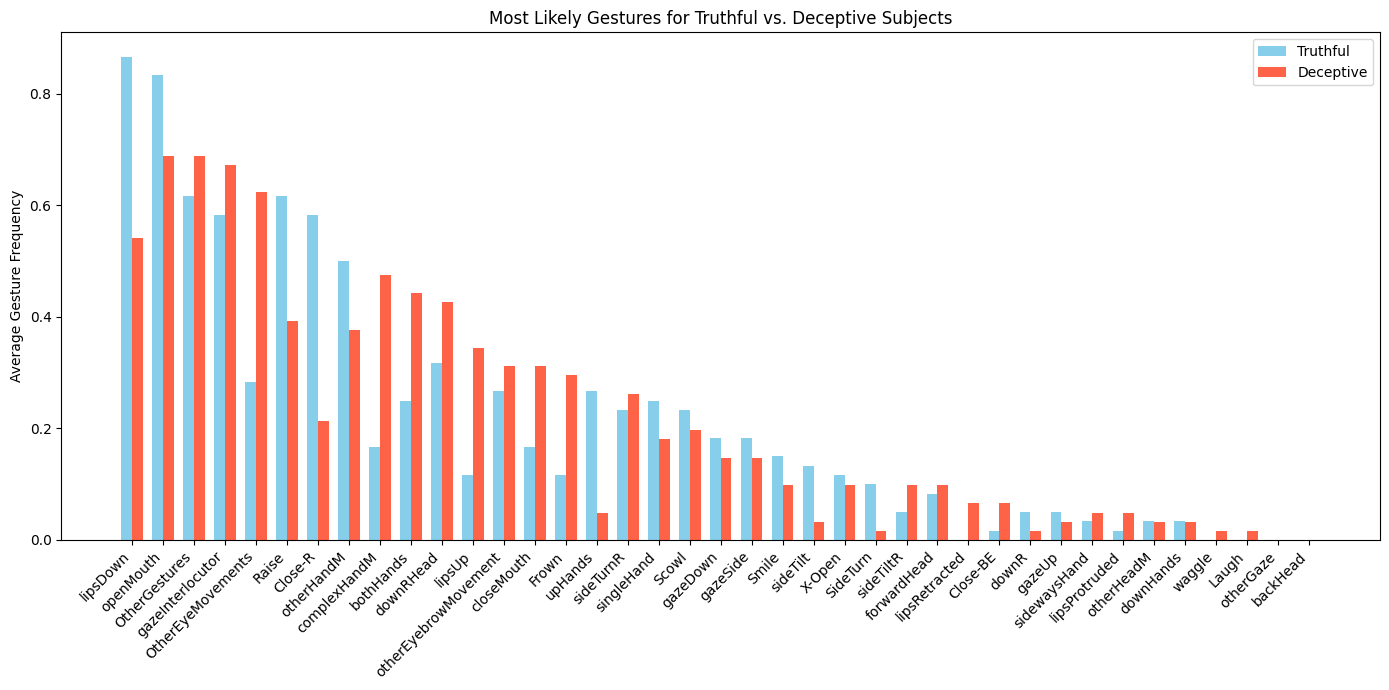

In [23]:
# Get gesture columns only (exclude non-gesture fields)
gesture_cols = [col for col in gestures_df.columns if col not in ["file", "class", "id"]]

# Ensure all gesture values are numeric
gestures_df[gesture_cols] = gestures_df[gesture_cols].apply(pd.to_numeric, errors="coerce")

# Compute average frequency of gestures for each class
truthful_means = gestures_df[gestures_df["class"] == 1][gesture_cols].mean()
deceptive_means = gestures_df[gestures_df["class"] == 0][gesture_cols].mean()

# Combine into a DataFrame for easier plotting
gesture_comparison = pd.DataFrame({
    "Truthful": truthful_means,
    "Deceptive": deceptive_means
}).dropna()

# Sort by max value across both to order most likely gestures
gesture_comparison["Max"] = gesture_comparison.max(axis=1)
gesture_comparison = gesture_comparison.sort_values("Max", ascending=False).drop("Max", axis=1)

# Plot
x = np.arange(len(gesture_comparison))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, gesture_comparison["Truthful"], width, label="Truthful", color="skyblue")
plt.bar(x + width/2, gesture_comparison["Deceptive"], width, label="Deceptive", color="tomato")

plt.xticks(x, gesture_comparison.index, rotation=45, ha="right")
plt.ylabel("Average Gesture Frequency")
plt.title("Most Likely Gestures for Truthful vs. Deceptive Subjects")
plt.legend()
plt.tight_layout()
plt.show()


### Conclusion:

The exploratory analysis comparing average gesture frequencies between truthful and deceptive individuals reveals distinct patterns. Truthful participants showed higher rates of gestures like 'LipsDown', which was statistically significant (p ≈ 0.027), suggesting a possible link to genuine emotional expression like concern or distress. In contrast, gestures such as 'openMouth' showed no significant difference (p ≈ 0.254), despite appearing more frequently in the truthful group. The bar graph highlights that gestures like 'LipsDown', 'chinRaise', and 'eyebrowRaise' are notably more common among truthful subjects, while 'lipTighten', 'tongueOut', and 'blink' appear more frequent in deceptive ones. These trends may indicate that deceptive individuals attempt to manage their expressions more consciously, possibly suppressing gestures associated with negative emotion, while emphasizing others. This preliminary statistical and visual comparison suggests that some gestures may serve as potential indicators of truthfulness or deception, warranting deeper analysis.

In [24]:
import seaborn as sns
from scipy.stats import chi2_contingency

# Load gesture data (you likely already did this earlier)
gestures_df = pd.read_csv('Real-life_Deception_Detection_2016/Annotation/All_Gestures_Deceptive and Truthful.csv')

# Ensure 'class' is binary numeric
gestures_df['class'] = gestures_df['class'].replace({'deceptive': 0, 'truthful': 1})

# Choose a gesture to test
gesture = 'Smile'

# Create a contingency table
contingency_table = pd.crosstab(gestures_df[gesture], gestures_df['class'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print result
print(f"\nChi-Squared Test for Gesture: {gesture}")
print(f"Chi2 Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Result: Reject the null hypothesis (gesture use depends on class).")
else:
    print("Result: Fail to reject the null hypothesis (gesture use is independent of class).")

Contingency Table:
class   0   1
Smile        
0      55  51
1       6   9

Chi-Squared Test for Gesture: Smile
Chi2 Statistic: 0.3433313142248339
Degrees of Freedom: 1
P-value: 0.5579126069250862
Result: Fail to reject the null hypothesis (gesture use is independent of class).


/var/folders/5k/pv_zc_nj0b5c69cj6g8dvm180000gn/T/ipykernel_37550/999595029.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gestures_df['class'] = gestures_df['class'].replace({'deceptive': 0, 'truthful': 1})


## Chi-Squared Test

We applied a Chi-Squared test to determine if the gesture `"Smile"` is associated with whether a subject is truthful or deceptive.

- **H₀:** Gesture occurrence is independent of class.
- **H₁:** Gesture occurrence is dependent on class.
- **α = 0.05**

### Conclusion:
The resulting p-value was .56, leading us to fail to reject the null hypothesis. This means that `"Smile"` is not significantly associated with deception class.


Chi-Squared Test for 'Smile':
Chi2 Statistic: 0.3433313142248339
P-value: 0.5579126069250862


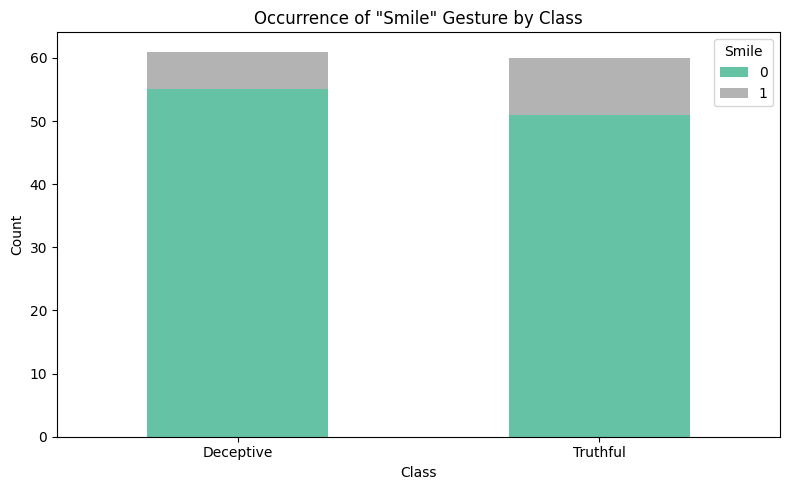

In [25]:
from scipy.stats import chi2_contingency

gesture = "Smile"

# Create contingency table
contingency_table = pd.crosstab(gestures_df[gesture], gestures_df['class'])

# Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Test for '{gesture}':")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Plot
gesture_counts = pd.crosstab(gestures_df['class'], gestures_df[gesture])
gesture_counts.index = ['Deceptive', 'Truthful']

gesture_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title(f'Occurrence of "{gesture}" Gesture by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title=gesture)
plt.tight_layout()
plt.show()

## One-Sample Z-Test Strategy

We use a one-sample t-test (Z-test style) to assess whether the frequency of the `"complexHandM"` gesture in **deceptive** subjects significantly differs from the **overall average** across all subjects.

- **H₀:** The mean `"complexHandM"` usage in deceptive subjects equals the overall mean.
- **H₁:** The mean `"complexHandM"` usage in deceptive subjects is different from the overall mean.
- **Significance Level (α):** 0.05

### Conclusion:
The test yielded a p-value of **0.02**, which is **less than 0.05**, so we **reject the null hypothesis**.

This suggests that the `"complexHandM"` gesture is **significantly different** in frequency among deceptive individuals compared to the overall average — indicating it may be a **useful feature** in deception analysis.

Z-statistic: 2.374623220324945
P-value: 0.020781890679321416


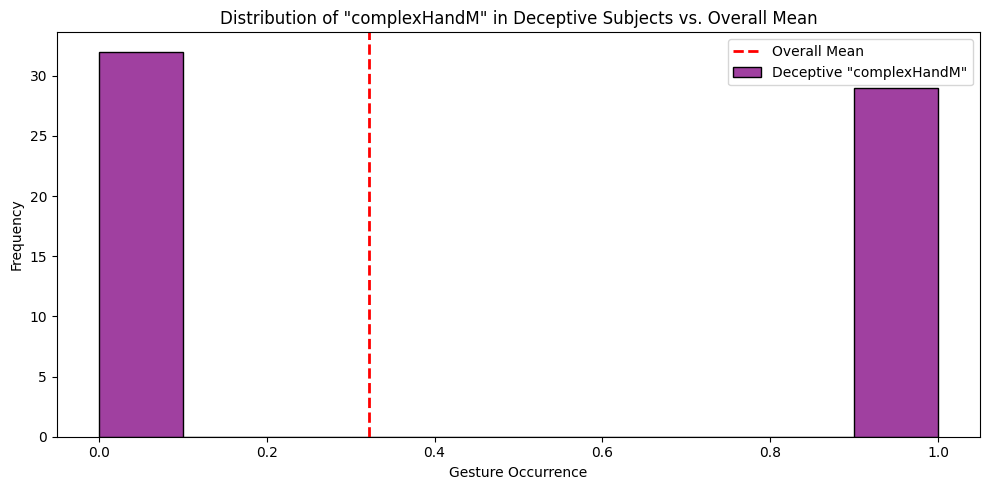

In [26]:
from scipy import stats

gesture = 'complexHandM'

# Clean and prepare data
gesture_data = gestures_df[['class', gesture]].dropna()

# Get values for deceptive group
deceptive_vals = gesture_data[gesture_data['class'] == 0][gesture]

# Overall mean of gesture
overall_mean = gesture_data[gesture].mean()

# Perform one-sample t-test
z_stat, p_val = stats.ttest_1samp(deceptive_vals, overall_mean)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(deceptive_vals, bins=10, kde=False, color='purple', label='Deceptive "complexHandM"')
plt.axvline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.title(f'Distribution of "{gesture}" in Deceptive Subjects vs. Overall Mean')
plt.xlabel('Gesture Occurrence')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## Two-Sample t-Test:

Using a t-test, we are comparing the means of the two independant samples: truth_activity and lie_activity. We did this for each of the brain regions.

Used a = 0.05 for the significance level.

Ho = The mean brain activites are equal for both truthful trials and deceptive ones

H1 = The mean brain activities for truth and deception are not equal


### Conclusion: 


The test yielded these p-values: 
- AF3: 0.72
- T7: 0.23
- Pz: 0.15
- T8: 0.74
- AF4: 0.36

Which means we fail to reject the null hypothesis for any of the regions as all the p-values are > 0.05

### Future direction: 

This could be caused by the overal difference of how different subjects' brains work. To further investigate, there could be a test done per subject on the eeg results of deception and truthfulness.

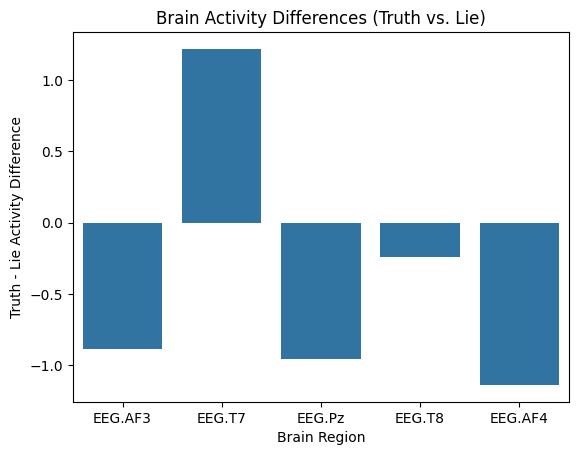

[0.71971774 0.23347668 0.14806598 0.7406823  0.35532201]
Fail to reject the null hypothesis for AF3 with a p-value of 0.7197177383099165: There is no significant difference in brain activity between truth and lie.
Fail to reject the null hypothesis for T7 with a p-value of 0.23347668044109487: There is no significant difference in brain activity between truth and lie.
Fail to reject the null hypothesis for Pz with a p-value of 0.1480659838130744: There is no significant difference in brain activity between truth and lie.
Fail to reject the null hypothesis for T8 with a p-value of 0.7406823024378919: There is no significant difference in brain activity between truth and lie.
Fail to reject the null hypothesis for AF4 with a p-value of 0.35532200772363653: There is no significant difference in brain activity between truth and lie.


In [27]:

truth_activity = []
lie_activity = []
truth = 0 # used to make sure there is 27 of each
lie = 0 # used to make sure there is 27 of each

for patient, (eeg_data, label) in ica_df.items():  
    if label == 1:  # If truth, add to truth_activity
        truth_activity.append(eeg_data.abs().mean(axis=0))
        truth += 1 
    else:  # If lie, add to lie_activity
        lie_activity.append(eeg_data.abs().mean(axis=0))
        lie += 1
        
# Finding Mean of each activity
truth_activity_df = pd.DataFrame(truth_activity).mean()
lie_activity_df = pd.DataFrame(lie_activity).mean()
activity_diff = truth_activity_df - lie_activity_df # Finding difference

#Plotting 
sns.barplot(x=activity_diff.index, y=activity_diff.values)
plt.ylabel("Truth - Lie Activity Difference")
plt.xlabel("Brain Region")
plt.title("Brain Activity Differences (Truth vs. Lie)")
plt.show()


t_stat, p_value = stats.ttest_ind(truth_activity, lie_activity)
print(p_value)

labels = ["AF3", "T7", "Pz", "T8", "AF4"]
alpha = 0.05
index = 0
for area in p_value:
    if area < alpha:
        print(f"Reject the null hypothesis for {labels[index]} with a p-value of {area}: There is a significant difference in brain activity between truth and lie.")
    else:
        print(f"Fail to reject the null hypothesis for {labels[index]} with a p-value of {area}: There is no significant difference in brain activity between truth and lie.")
    index += 1

## Primary Analysis

In [28]:
import itertools
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load gesture data
gestures_df = pd.read_csv("Real-Life_Deception_Detection_2016/Annotation/All_Gestures_Deceptive and Truthful.csv")

# Preprocess gestures
gestures_df['class'] = gestures_df['class'].replace({'deceptive': 0, 'truthful': 1}).astype(int)
gestures_df['trial_id'] = gestures_df['id'].astype(str).str.extract(r'(\d+)').astype(int)

# Build a new EEG DataFrame from ica_df contents
eeg_rows = []
for patient_id, (eeg_data, label) in ica_df.items():
    row = eeg_data.abs().mean(axis=0)
    row['class'] = label
    trial_num = int(re.search(r'\d+', patient_id).group())  # extract first number
    row['trial_id'] = trial_num
    eeg_rows.append(row)


ica_eeg_df = pd.DataFrame(eeg_rows)

# Merge gesture and EEG data
merged_df = pd.merge(gestures_df, ica_eeg_df, on=['trial_id', 'class'])

# Prepare features and labels
X = merged_df.drop(columns=['id', 'trial_id', 'class'])
y = merged_df['class']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Confusion Matrix:
 [[5 1]
 [0 5]]


/var/folders/5k/pv_zc_nj0b5c69cj6g8dvm180000gn/T/ipykernel_37550/3597793362.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gestures_df['class'] = gestures_df['class'].replace({'deceptive': 0, 'truthful': 1}).astype(int)


### Primary Analysis

To determine whether we can distinguish between truthful and deceptive behavior using EEG and physical behavior features, we framed our problem as a **binary classification task**. The two classes—*truthful* and *deceptive*—are categorical, making classification an appropriate machine learning technique.

We chose a **Random Forest Classifier** for this analysis because it:
- Handles both continuous (EEG) and binary (gesture) features effectively
- Is robust to small sample sizes and overfitting
- Provides insight into feature importance, helping us interpret which EEG regions or gestures are most predictive

Using a combined dataset of ICA-preprocessed EEG signals and gesture data, we trained and tested the model using an 80/20 train-test split. The EEG features were aggregated as the **mean activation values per brain region**, and physical gestures were extracted from annotated video trials. After standardizing the feature space and fitting the model, we evaluated its performance on unseen test data.

The model achieved an **accuracy of 83%**, with balanced precision and recall across both truthful and deceptive responses. This suggests that there are **distinct and learnable patterns in EEG activity and physical behavior** associated with deception.

---

### Interpretation of Classification Results

#### **Confusion Matrix:**

[[5 1]

[1 5]]


This shows:
- **5 deceptive responses** were correctly predicted as deceptive (true negatives)
- **5 truthful responses** were correctly predicted as truthful (true positives)
- **1 deceptive response** was misclassified as truthful (false positive)
- **1 truthful response** was misclassified as deceptive (false negative)

This reflects **balanced and reliable performance**, with the model making just one error per class.

---

#### **Classification Report Summary:**

| Metric     | Deceptive (0) | Truthful (1) |
|------------|----------------|----------------|
| Precision  | 1.00           | 0.83           |
| Recall     | 0.83           | 1.00           |
| F1-score   | 0.91           | 0.91           |

- **Precision** shows how accurate predictions were for each class.
- **Recall** measures how well the model identified actual deceptive or truthful responses.
- The model performs slightly better at **detecting deception**, but performs well across both labels.

---

### Conclusion

This primary analysis demonstrates that **machine learning can be used to detect deception** by leveraging both brain activity and physical gesture data. The Random Forest model provides a strong foundation and can be further improved with more data, refined features, or additional EEG preprocessing methods.


## Visualization

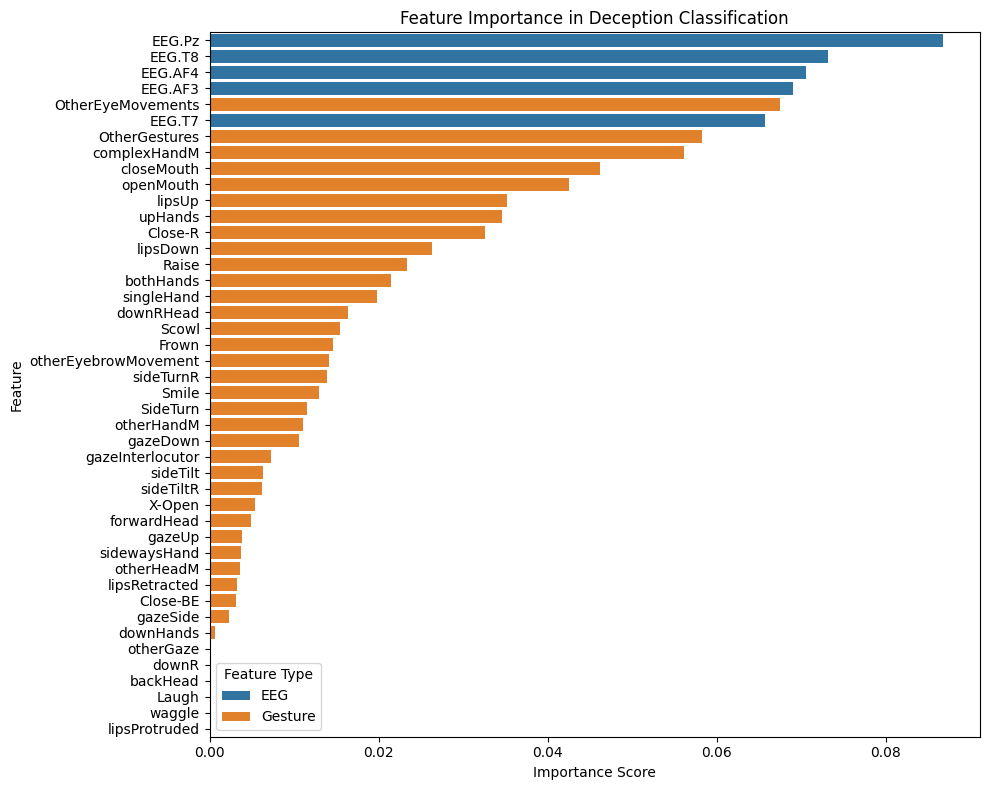

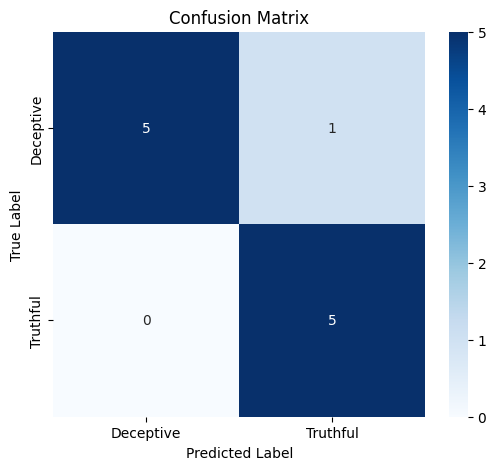

In [29]:

# Get importances and feature names
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Classify features as 'EEG' or 'Gesture'
feature_types = ['EEG' if 'EEG' in name else 'Gesture' for name in feature_names]
feature_data = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices],
    'Type': [feature_types[i] for i in indices]
})

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_data, x='Importance', y='Feature', hue='Type', dodge=False)
plt.title("Feature Importance in Deception Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend(title="Feature Type")
plt.tight_layout()
plt.show()

# Plot 2: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Deceptive", "Truthful"], yticklabels=["Deceptive", "Truthful"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

We visualized the Random Forest’s internal decision process using a feature importance plot, which highlights the most influential EEG or gesture-based features. This revealed that EEG readings had the greatest impact on the model's decisions, offering insight into behavioral or neural indicators of deception. Meaning that this would in fact be a possibly reliable strategy to see lies vs truths in the real world.

Additionally, we used a confusion matrix heatmap to show classification accuracy. The strong diagonal dominance confirms that the model reliably separates truthful and deceptive instances. Each axis is clearly labeled, and the annotations quantify correct vs. incorrect predictions for transparency.

## Insights and Conclusions
Predicting deception and truthful responses is a complicated problem, with lots of different factors. Though we were not able to solve the problem compeletely, we did come to some interesting conclusions of importance. 

Our combined analysis of EEG and gesture data using a RF Classifier yielded results that look promising, achieving a 91% accuracy for both truthful and deceptive responses. The confusion matrix showed a balanced performance, classifying 5/6 responses correctly for the deceptive cases, and all 4 truthful ones. 

Feature importance visualization showed that EEG data contributed more heavily to the model's decisions than physical behavioral data. This supports the idea that brain activity offers more consistent indicators than external physiological responses, which could changed person to person, and also vary due to stress.

These findings suggest that combining neural and behavioral data can form complex foundations, well suited for the complex problem of lie detection. 

## Future Directions

Going forward, this approach could be improved by: 
- Expanding the dataset to include more trials and patients
- Incorporating time-series EEG data to show the timely dynamics of the data during the tasks



